# 中心極限定理とその応用 - サンプルサイズの計算 (サンプルコード)

# 要旨

個人的に作成したサンプルコードをフリーウェアとして公開する。

# 中心極限定理の実例

## カイ二乗分布

<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:16: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:16: SyntaxWarning: invalid escape sequence '\c'
C:\Users\tkys0\AppData\Local\Temp\ipykernel_28292\2895651876.py:14: SyntaxWarning: invalid escape sequence '\c'
  ax.set_xlabel('$\chi^2$ value')
C:\Users\tkys0\AppData\Local\Temp\ipykernel_28292\2895651876.py:16: SyntaxWarning: invalid escape sequence '\c'
  ax.set_title(f'Histgram of {single_dataset_size} samples from $\chi^2$ distribution (degree of freedom = {df})')


<class 'numpy.ndarray'>


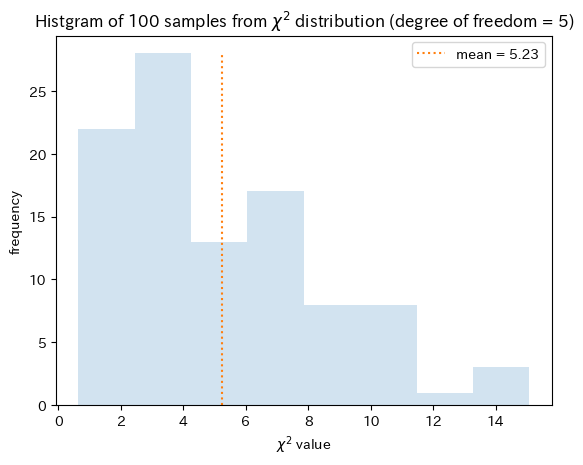

In [1]:
import numpy as np
from scipy.stats import chi2
df = 5  # degree of freedom
single_dataset_size = 100
r = chi2.rvs(df, size=single_dataset_size)  # Generate random numbers (Random variates)
mean = np.mean(r)

print(type(r))

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
n, bins, patches = ax.hist(r, density=False, bins='auto', histtype='stepfilled', alpha=0.2)
ax.plot((mean, mean), (0, np.max(n)), linestyle=':', label='mean = {0:.2f}'.format(mean))
ax.set_xlabel('$\chi^2$ value')
ax.set_ylabel('frequency')
ax.set_title(f'Histgram of {single_dataset_size} samples from $\chi^2$ distribution (degree of freedom = {df})')
ax.legend()
plt.show()

## カイ二乗分布 平均値

<>:18: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
C:\Users\tkys0\AppData\Local\Temp\ipykernel_28292\3312231696.py:18: SyntaxWarning: invalid escape sequence '\c'
  ax.set_xlabel(f'mean of $\chi^2$ value (single dataset size = {single_dataset_size})')
C:\Users\tkys0\AppData\Local\Temp\ipykernel_28292\3312231696.py:20: SyntaxWarning: invalid escape sequence '\c'
  ax.set_title(f'Histgram of {sample_mean_num} mean values from $\chi^2$ distribution (degree of freedom = {df_chi2})')


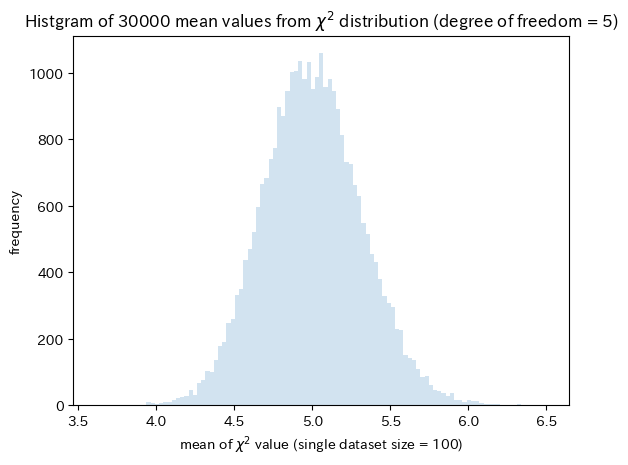

In [2]:
# 「カイ二乗分布から100点とって平均値を求める」を10000回繰り返す
import numpy as np
from scipy.stats import chi2

sample_mean_num = 30000
sample_mean_list = []
single_dataset_size = 100
df_chi2 = 5  # degree of freedom

for i in range(sample_mean_num):
    dataset_chi2 = chi2.rvs(df_chi2, size=single_dataset_size)
    mean = np.mean(dataset_chi2)
    sample_mean_list.append(mean)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(sample_mean_list, density=False, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlabel(f'mean of $\chi^2$ value (single dataset size = {single_dataset_size})')
ax.set_ylabel('frequency')
ax.set_title(f'Histgram of {sample_mean_num} mean values from $\chi^2$ distribution (degree of freedom = {df_chi2})')
plt.show()

## 正規性の検討

In [3]:
# 歪度
from scipy.stats import skew
s = skew(sample_mean_list)
print('歪度 =', s)

# 尖度
from scipy.stats import kurtosis
k = kurtosis(sample_mean_list)
print('尖度 =', k)

歪度 = 0.14106997130152796
尖度 = 0.08295369415572784


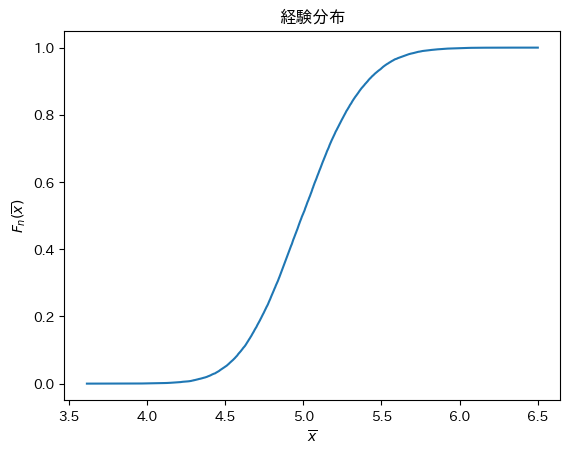

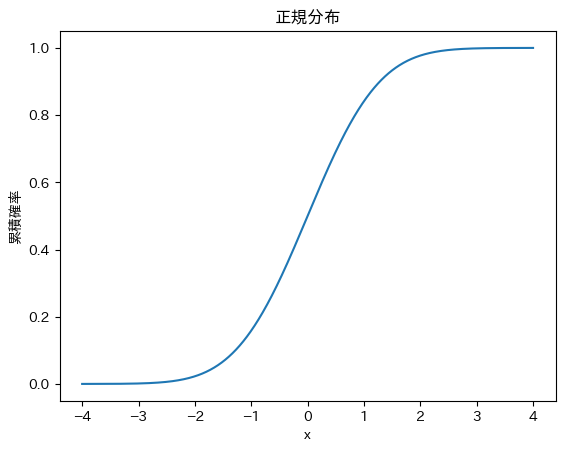

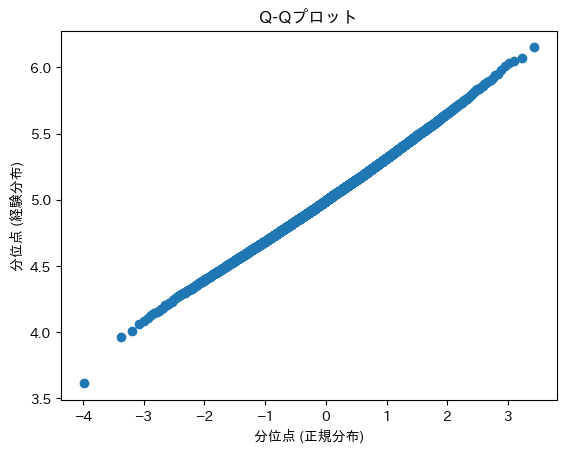

In [4]:
## Q-Qプロット

# 経験分布(Fx)
sample_mean_list.sort()
list_size = len(sample_mean_list)
count = 0
empirical_dist = []  # 経験分布
for x in sample_mean_list:
    count += 1
    empirical_dist.append(count / list_size)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(sample_mean_list, empirical_dist)
ax.set_xlabel(r'$\overline{x}$')
ax.set_ylabel(r'$F_n(\overline{x})$')
ax.set_title('経験分布')
plt.show()

# 正規分布(Fy)
import numpy as np
from scipy.stats import norm
normal_dist_x = np.linspace(-4, 4, 1000)
normal_dist_cdf = norm.cdf(normal_dist_x, loc=0, scale=1)
fig, ax = plt.subplots()
ax.plot(normal_dist_x, normal_dist_cdf)
ax.set_xlabel('x')
ax.set_ylabel('累積確率')
ax.set_title('正規分布')
plt.show()

# 分位点のペア(qx, qy)
q_emp_list = []
q_norm_list = []
step = 10
for i in range(0, list_size, step):
    # 累積確率 from 経験分布
    cumulative_prob = empirical_dist[i]
    # 分位点 from 経験分布
    q_emp_list.append(sample_mean_list[i])
    # 分位点 from 正規分布
    q_norm_list.append(norm.ppf(cumulative_prob))

fig, ax = plt.subplots()
ax.scatter(q_norm_list, q_emp_list)
ax.set_xlabel('分位点 (正規分布)')
ax.set_ylabel('分位点 (経験分布)')
ax.set_title('Q-Qプロット')
plt.show()

# 仮説検定に必要なサンプルサイズの計算(1) 母平均の検定

In [7]:
# サンプルサイズ
import numpy as np
from scipy.stats import norm
np.power(norm.ppf(0.975)+ norm.ppf(0.8), 2)  * np.power(2, 2) / np.power(5.5 - 5, 2)

np.float64(125.58207574958541)

n = 126.0
c1 = 5.349214939074533
c2 = 5.350044842596958


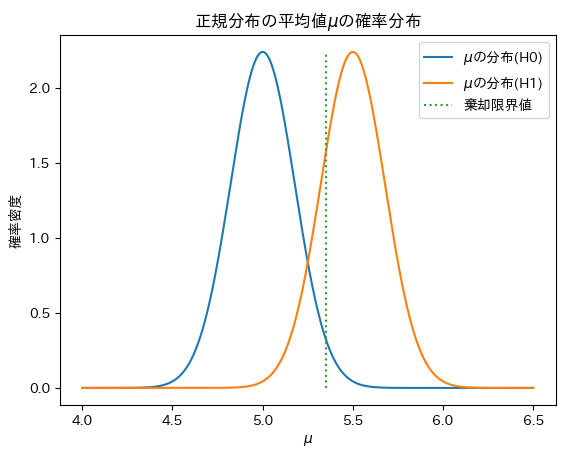

In [6]:
import numpy as np
from scipy.stats import norm

# サンプルサイズ
n = np.power(norm.ppf(0.975)+ norm.ppf(0.8), 2)  * np.power(2, 2) / np.power(5.5 - 5, 2)
n = np.ceil(n)
print('n =', n)

# 確率変数X
d = np.linspace(4, 6.5, 1000)

# H0
mu_1 = 5   # Xの平均値 (帰無仮説H0)
sigma = 2  # Xの標準偏差
mean_sigma = np.sqrt(np.power(sigma, 2) / n)  # Xの平均の標準偏差
x_dist_H0 = norm.pdf(d, loc=mu_1, scale=mean_sigma)

# 棄却限界値
c1 = mu_1 + norm.ppf(0.975) * mean_sigma
print('c1 =', c1)

# H1
mu_2 = 5.5  # X平均値 (対立仮説H1)
x_dist_H1 = norm.pdf(d, loc=mu_2, scale=mean_sigma)

# 第二種の過誤確率β=0.2(検出力0.8)の正規分位点
c2 = mu_2 - np.abs(norm.ppf(0.2)) * mean_sigma
print('c2 =', c2)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title(r'正規分布の平均値$\mu$の確率分布')
ax.plot(d, x_dist_H0, label=r'$\mu$の分布(H0)')
ax.plot(d, x_dist_H1, label=r'$\mu$の分布(H1)')
ax.plot((c1, c1), (0, np.max(x_dist_H0)), linestyle=':', label='棄却限界値')
ax.set_xlabel(r'$\mu$')
ax.set_ylabel('確率密度')
ax.legend()
plt.show()


# 仮説検定に必要なサンプルサイズの計算(2) 母平均の差の検定

In [8]:
import numpy as np
from scipy.stats import norm
z_alpha2 = norm.ppf(0.975)
z_beta = norm.ppf(0.8)
n = np.power(z_alpha2+ z_beta, 2) * (np.power(2, 2) + np.power(2.1, 2)) / np.power((5.5 - 5) - 0, 2)
print(z_alpha2)
print(z_beta)
print(n)

1.959963984540054
0.8416212335729143
264.03631426350336


z_alpha2= 1.959963984540054
z_beta= 0.8416212335729143
n= 265.0
d_H0 = 0
var_d = 0.031735849056603774
std_d = 0.17814558388184584
c = 0.349158928413277
d_H1 = 0.5
z_H1 = -0.8467292216840333
beta = 0.19857303350687472
stat_power 0.8014269664931253


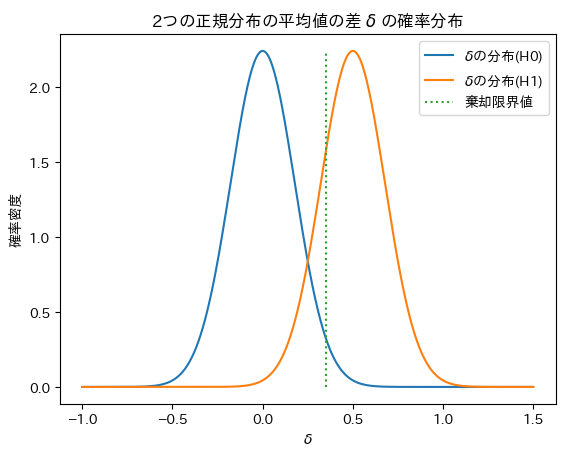

In [9]:
import numpy as np
from scipy.stats import norm

# 正規分布1
m_1 = 5   # Xの平均値
sigma_1 = 2  # Xの標準偏差

# 正規分布2
m_2 = 5.5   # Xの平均値
sigma_2 = 2.1  # Xの標準偏差

# サンプルサイズ
z_alpha2 = norm.ppf(0.975)
z_beta = norm.ppf(0.8)
n = np.power(z_alpha2 + z_beta, 2)  * (np.power(sigma_1, 2) + np.power(sigma_2, 2)) / np.power(m_2 - m_1, 2)
n = np.ceil(n)
print('z_alpha2=', z_alpha2)
print('z_beta=', z_beta)
print('n=', n)

# dの確率分布(H0)
d = np.linspace(-1, 1.5, 1000)
d_H0 = 0
var_d = (np.power(sigma_1, 2) + np.power(sigma_2, 2)) / n
std_d = np.sqrt(var_d)
d_dist_H0 = norm.pdf(d, loc=d_H0, scale=std_d)
print('d_H0 =', d_H0)
print('var_d =', var_d)
print('std_d =', std_d)

# H0 棄却限界値 (片側2.5% (両側5%))
c = d_H0 + z_alpha2 * np.sqrt(var_d)
print('c =', c)

# dの確率分布(H1)
d_H1 = m_2 - m_1
d_dist_H1 = norm.pdf(d, loc=d_H1, scale=std_d)
print('d_H1 =', d_H1)

# H0 棄却限界値をH1のもとで標準化
z_H1 = (c - d_H1) / std_d
print('z_H1 =', z_H1)

# 第二種の過誤 確率β
beta = norm.cdf(z_H1)
print('beta =', beta)

# 検出力 1-β
stat_power = 1 - beta
print('stat_power', stat_power)

# グラフ化
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(d, d_dist_H0, label=r'$\delta$の分布(H0)')
ax.plot(d, d_dist_H1, label=r'$\delta$の分布(H1)')
ax.plot((c, c), (0, np.max(d_dist_H0)), linestyle=':', label='棄却限界値')
ax.set_title(r'2つの正規分布の平均値の差 $\delta $ の確率分布')
ax.set_xlabel(r'$\delta$')
ax.set_ylabel('確率密度')
ax.legend()
plt.show()